<a href="https://www.kaggle.com/code/moses922/customeranaylsis-anz?scriptVersionId=203818613" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ANZ Banking Data Analysis
This notebook explores the ANZ banking data to provide insights into customer behavior. It covers data cleaning, exploratory data analysis (EDA), and visualizations to uncover trends in customer transactions.

---

## Table of Contents
1. [Data Loading](#data-loading)
2. [Data Overview](#data-overview)
3. [Summary Statistics](#summary-statistics)
4. [Data Cleaning](#data-cleaning)
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
6. [Conclusion](#conclusion)
7. [Appendix](#appendix)

---

# Data Loading
The dataset is loaded from the input directory and briefly examined for structure.

python
 Load the ANZ banking data CSV file

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv('/kaggle/input/anz-banking-data/ANZ.csv')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# **Data Overview**

# *General Structure and Duplicates*

We check for the general structure of the dataset, check for duplicate rows, and handle missing values.

python

In [2]:
# General structure, duplicates, and missing values check
df.info()
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

# Summary Statistics
We provide summary statistics to understand the distribution of numerical variables like amount and balance.

In [3]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
card_present_flag,7717.0,0.802644,0.398029,0.00,1.000,1.00,1.000,1.00
merchant_code,883.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
balance,12043.0,14704.195553,31503.722652,0.24,3158.585,6432.01,12465.945,267128.52
age,12043.0,30.582330,10.046343,18.00,22.000,28.00,38.000,78.00
amount,12043.0,187.933588,592.599934,0.10,16.000,29.00,53.655,8835.98


# Data Cleaning
We ensure date-related columns are in the proper format and extract useful information like day, month, and year.

In [4]:
# Convert 'extraction' column to datetime and extract year, month, day
df['extraction'] = pd.to_datetime(df['extraction'], format='%d%m%Y', errors='coerce')
df['extraction'] = df['extraction'].dt.strftime('%d%m%Y')
df['year'] = df['extraction'].str[-4:]
df['month'] = df['extraction'].str.slice(2, 4)
df['day'] = df['extraction'].str.slice(0, 2)

#  Age Group Categorization
 We categorize the customers into age groups for further analysis on spending patterns across different age segments.

In [5]:
# Categorizing age into groups for easier analysis
df['age_group'] = pd.cut(df.age, [10, 20, 30, 40, 50, 60, 80], 
                         labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'], right=False)

# Verify the categorization
df[['age', 'age_group']].head()

,age,age_group
0,26,20-30
1,26,20-30
2,38,30-40
3,40,40-50
4,26,20-30


# Exploratory Data Analysis (EDA)
# Gender Composition
We analyze the gender composition of customers.

Text(0.5, 1.0, 'Gender Count')

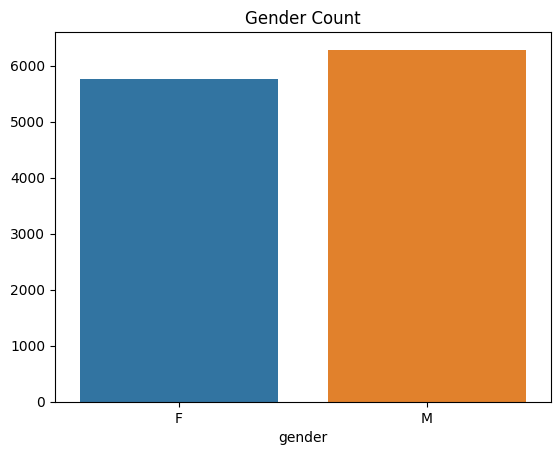

In [6]:
male_vs_female = df.groupby('gender')['customer_id'].count()
sns.barplot(x=male_vs_female.index, y=male_vs_female.values)
plt.title('Gender Count')

# Gender and Age Group Distribution
We show customer distribution across age groups for each gender.

/tmp/ipykernel_17/524965489.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_vs_age = df.groupby(['gender', 'age_group'])['customer_id'].nunique().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

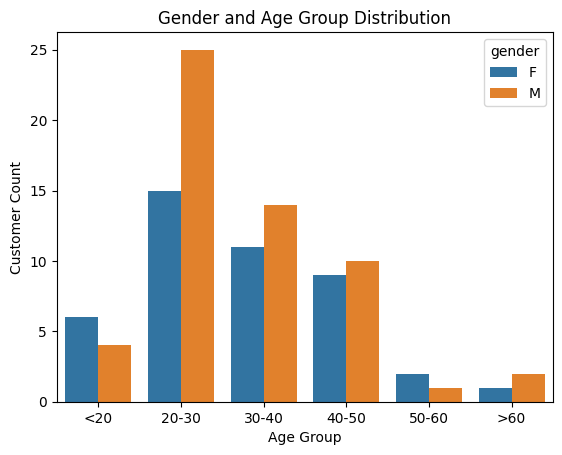

In [7]:
# Gender and age group distribution
# Grouping customers by gender and age group, counting unique customer IDs
gender_vs_age = df.groupby(['gender', 'age_group'])['customer_id'].nunique().reset_index()

# Plot gender distribution across age groups
sns.barplot(x='age_group', y='customer_id', hue='gender', data=gender_vs_age)
plt.title('Gender and Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.show()

# Top 10 Customers by Transaction Count
This plot shows the top customers by the number of transactions.

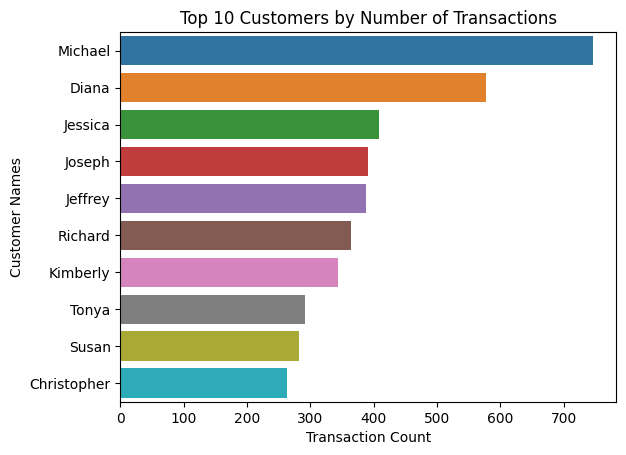

In [8]:
# Top 10 customers by transaction count
top_10_names = df.groupby('first_name')['transaction_id'].count().reset_index()
top_10_sorted = top_10_names.sort_values('transaction_id', ascending=False).head(10)

# Plot top 10 customers by transaction count
sns.barplot(x='transaction_id', y='first_name', data=top_10_sorted, orient='h')
plt.title('Top 10 Customers by Number of Transactions')
plt.xlabel('Transaction Count')
plt.ylabel('Customer Names')
plt.show()

# Top 10 Customers by Amount Spent
We analyze the top customers who spent the most money.

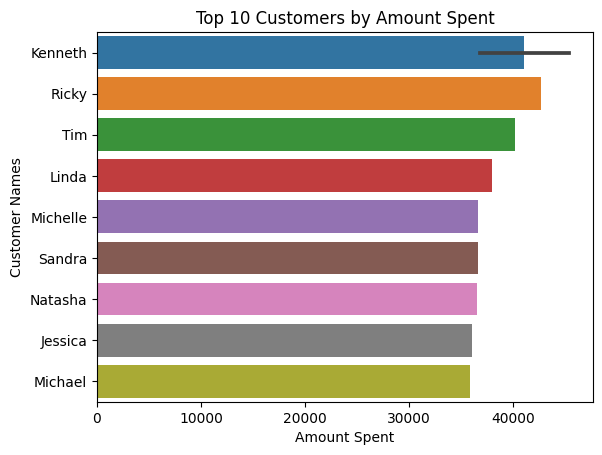

Text(0.5, 1.0, 'Top 10 Customers by Amount Spent')

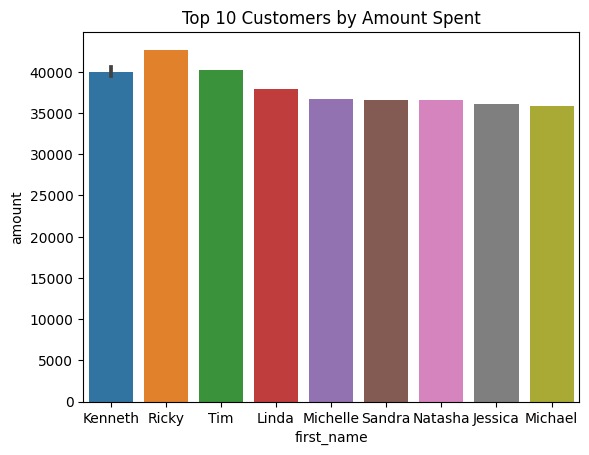

In [9]:
# Top 10 customers by total amount spent
amount_value_sorted = df.groupby('customer_id')['amount'].sum().reset_index()

# Sort by amount spent in descending order and select the top 10 customers
amount_value_sorted = amount_value_sorted.sort_values(by='amount', ascending=False).head(10)

# Merge to include customer names for easier interpretation in the plot
merged_amount = pd.merge(amount_value_sorted, df[['customer_id', 'first_name']].drop_duplicates(), on='customer_id')

# Plot top 10 customers by amount spent
sns.barplot(x='amount', y='first_name', data=merged_amount, orient='h')
plt.title('Top 10 Customers by Amount Spent')
plt.xlabel('Amount Spent')
plt.ylabel('Customer Names')
plt.show()


merged_amount = pd.merge(amount_value_sorted, df[['customer_id', 'first_name']], on='customer_id')
sns.barplot(x='first_name', y='amount', data=merged_amount)
plt.title(f'Top 10 Customers by Amount Spent')

# Conclusion
This analysis provided insights into customer demographics, transaction behavior, and top spenders. Future work could explore deeper trends over time or correlations between specific customer characteristics and spending patterns.

# Appendix
This section provides additional information, context, and resources for further exploration.

# Dataset
The dataset used in this analysis is the ANZ Transaction Dataset, available on Kaggle.

# Source: ANZ Banking Data
Description: The dataset contains anonymized transactions of 100 customers over a three-month period.


For further analysis or collaboration, feel free to reach out!